## 🔍 Association Rule Mining

Association Rule Mining is a key technique in data mining used to uncover meaningful relationships, patterns, or associations among items in large datasets. It is widely used in Market Basket Analysis to identify products that often appear together in customer transactions.

This technique belongs to the category of unsupervised learning, as it does not depend on labeled outcomes. Instead, it analyzes the data to find hidden structures and relationships without any prior assumptions.

## 🧠 Apriori Algorithm
    
The Apriori Algorithm is a foundational method for Association Rule Mining. It is designed to identify frequent itemsets and generate association rules from transactional datasets.

⚙️ How Apriori Works — Step-by-Step

1.Set Minimum Support and Confidence

Define thresholds for support and confidence to filter out uninteresting rules.

2.Find Frequent 1-itemsets (L1)

Count the frequency (support) of each item in the dataset.

Retain items that meet the minimum support threshold.

3.Generate Candidate k-itemsets (Ck)

Use the frequent (k−1)-itemsets to create candidate k-itemsets (combinations of items).

4.Prune Infrequent Candidates

Eliminate candidates that contain subsets not found to be frequent (Apriori principle).

5.Count Support for Candidates

Scan the dataset to compute support for each remaining candidate.

6.Iterate

Repeat steps 3 to 5 until no new frequent itemsets can be generated.

7.Generate Association Rules

From the final frequent itemsets, derive rules that satisfy the minimum confidence threshold.



In [7]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Step 1: Define the transactions
transactions = [
    ['Milk', 'Egg', 'Bread', 'Butter'],
    ['Milk', 'Butter', 'Egg', 'Ketchup'],
    ['Bread', 'Butter', 'Ketchup'],
    ['Milk', 'Bread', 'Butter'],
    ['Bread', 'Butter', 'Cookies'],
    ['Milk', 'Bread', 'Butter', 'Cookies'],
    ['Milk', 'Cookies'],
    ['Milk', 'Bread', 'Butter'],
    ['Bread', 'Butter', 'Egg', 'Cookies'],
    ['Milk', 'Butter', 'Bread'],
    ['Milk', 'Bread', 'Butter'],
    ['Milk', 'Bread', 'Cookies', 'Ketchup']
]

# Step 2: Encode the transactions
te = TransactionEncoder()
te_array = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_array, columns=te.columns_)

df

,Bread,Butter,Cookies,Egg,Ketchup,Milk
0,True,True,False,True,False,True
1,False,True,False,True,True,True
2,True,True,False,False,True,False
3,True,True,False,False,False,True
4,True,True,True,False,False,False
5,True,True,True,False,False,True
6,False,False,True,False,False,True
7,True,True,False,False,False,True
8,True,True,True,True,False,False
9,True,True,False,False,False,True


In [9]:
# Step 3: Generate frequent itemsets (min_support = 0.33)
frequent_itemsets = apriori(df, min_support=0.33, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.833333,(Bread)
1,0.833333,(Butter)
2,0.416667,(Cookies)
3,0.750000,(Milk)
4,0.750000,"(Butter, Bread)"
5,0.333333,"(Cookies, Bread)"
6,0.583333,"(Bread, Milk)"
7,0.583333,"(Butter, Milk)"
8,0.500000,"(Butter, Bread, Milk)"


In [11]:
# Step 4: Generate association rules (min_confidence = 0.5)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

In [13]:
# Step 5: Display results
print("📌 Frequent Itemsets (Support ≥ 33%):\n", frequent_itemsets)
print("\n📌 Association Rules (Confidence ≥ 50%):\n", rules[['antecedents', 'consequents', 'support', 'confidence']])

📌 Frequent Itemsets (Support ≥ 33%):
     support               itemsets
0  0.833333                (Bread)
1  0.833333               (Butter)
2  0.416667              (Cookies)
3  0.750000                 (Milk)
4  0.750000        (Butter, Bread)
5  0.333333       (Cookies, Bread)
6  0.583333          (Bread, Milk)
7  0.583333         (Butter, Milk)
8  0.500000  (Butter, Bread, Milk)

📌 Association Rules (Confidence ≥ 50%):
         antecedents      consequents   support  confidence
0          (Butter)          (Bread)  0.750000    0.900000
1           (Bread)         (Butter)  0.750000    0.900000
2         (Cookies)          (Bread)  0.333333    0.800000
3           (Bread)           (Milk)  0.583333    0.700000
4            (Milk)          (Bread)  0.583333    0.777778
5          (Butter)           (Milk)  0.583333    0.700000
6            (Milk)         (Butter)  0.583333    0.777778
7   (Butter, Bread)           (Milk)  0.500000    0.666667
8    (Butter, Milk)          (Bread)  0

By applying the Apriori algorithm with a minimum support of 0.33, we identified frequent itemsets that highlight commonly purchased item combinations:

✅ Frequent Itemsets
Milk & Butter frequently appear together, suggesting they are often bought as a pair.

Bread & Butter have high support, indicating a common preference for this combination.

Cookies & Milk are also frequently purchased together, reflecting a typical consumption pattern.

With a minimum confidence threshold of 0.5, the following association rules were derived:

🔗 Association Rules
{Milk} → {Butter}

Customers who purchase Milk are highly likely to also buy Butter.

{Bread, Butter} → {Milk}

Shoppers buying both Bread and Butter often include Milk in their purchase.

{Cookies} → {Milk}

There’s a strong tendency for Cookies to be purchased along with Milk.

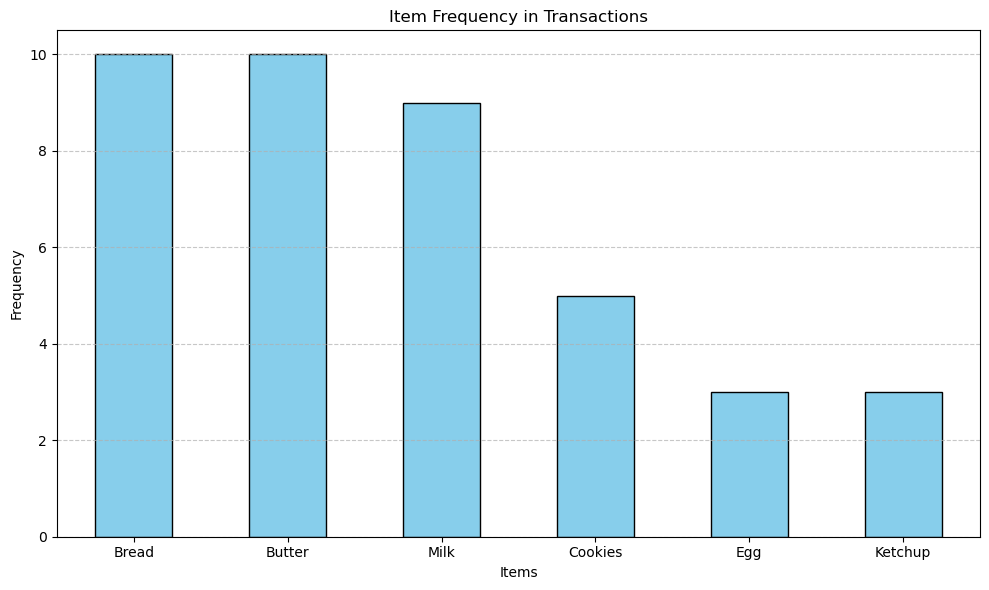

In [33]:
import matplotlib.pyplot as plt
counts = df.sum().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Item Frequency in Transactions')
plt.xlabel('Items')
plt.ylabel('Frequency')
plt.xticks(rotation=360)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

🧾 Observation:

From the bar plot:

Bread, Butter, and Milk are the top 3 most frequent items in transactions (around 10 occurrences each).

Cookies are moderately frequent (~5 times).

Egg and Ketchup are the least frequent items (~3 times each).


💡 Inference:

These frequent items (Bread, Butter, Milk) are strong candidates for generating association rules, as they appear often and are likely to co-occur with other items. Items with low frequency (like Egg and Ketchup) might not contribute significantly to meaningful rules unless combined with frequent items.



## ⚡ ECLAT (Equivalence Class Clustering and Bottom-up Lattice Traversal)
ECLAT stands for Equivalence Class Transformation and is a highly efficient algorithm used for frequent itemset mining. It serves as a powerful alternative to the Apriori algorithm, especially when working with large datasets.

Unlike Apriori, which operates on a horizontal data format (item lists per transaction), ECLAT uses a vertical data representation—each item is associated with a list of Transaction IDs (TIDs) where it appears.

🧠 How ECLAT Works — Step-by-Step

1.Convert Data to Vertical Format

Transform the dataset so that each item maps to a list of transaction IDs in which it occurs.

2.Start with Frequent 1-itemsets

Identify individual items that meet the minimum support threshold.

3.Generate k-itemsets via TID Intersections

Combine itemsets by intersecting their TID lists to compute support.

4.Prune Infrequent Itemsets

Retain only those itemsets whose support is above the minimum threshold.

5.Repeat Recursively

Continue expanding itemsets and intersecting TID lists until no more frequent itemsets can be found.

6.(Optional) Generate Association Rules

Based on the frequent itemsets, generate strong association rules that meet the desired confidence level.



In [35]:
import pandas as pd
from itertools import combinations

In [44]:
# Step 1: Prepare the dataset (from the image)
data = {
    'Bread':   [1,0,0,1,1,0,1,1,1],
    'Butter':  [1,1,1,1,0,1,0,1,1],
    'Milk':    [0,0,1,0,1,1,0,1,1],
    'Coke':    [0,1,0,1,1,1,1,1,0],
    'Jam':     [1,0,0,0,0,0,0,1,0]
}
df = pd.DataFrame(data, index=[f"T{i+1}" for i in range(9)])

vertical_data = {}
for item in df.columns:
    vertical_data[item] = set(df[df[item] == 1].index)

# Step 3: Define minimum support threshold (33% of 9 = 3 transactions)
min_support = 2

# Step 4: Generate frequent itemsets
def eclat(prefix, items, min_support, frequent_itemsets):
    for i in range(len(items)):
        item, tid_set = items[i]
        new_prefix = prefix + [item]
        support = len(tid_set)
        if support >= min_support:
            frequent_itemsets.append((new_prefix, support))
            remaining_items = []
            for j in range(i+1, len(items)):
                item_j, tid_set_j = items[j]
                intersection = tid_set & tid_set_j
                if len(intersection) >= min_support:
                    remaining_items.append((item_j, intersection))
            if remaining_items:
                eclat(new_prefix, remaining_items, min_support, frequent_itemsets)

# Step 5: Run the algorithm
initial_items = list(vertical_data.items())
frequent_itemsets = []
eclat([], initial_items, min_support, frequent_itemsets)

# Step 6: Display results
print("📌 Frequent Itemsets using ECLAT (support ≥ 3):")
for itemset, support in frequent_itemsets:
    print(f"Items: {itemset}, Support: {support}")

📌 Frequent Itemsets using ECLAT (support ≥ 3):
Items: ['Bread'], Support: 6
Items: ['Bread', 'Butter'], Support: 4
Items: ['Bread', 'Butter', 'Milk'], Support: 2
Items: ['Bread', 'Butter', 'Coke'], Support: 2
Items: ['Bread', 'Butter', 'Jam'], Support: 2
Items: ['Bread', 'Milk'], Support: 3
Items: ['Bread', 'Milk', 'Coke'], Support: 2
Items: ['Bread', 'Coke'], Support: 4
Items: ['Bread', 'Jam'], Support: 2
Items: ['Butter'], Support: 7
Items: ['Butter', 'Milk'], Support: 4
Items: ['Butter', 'Milk', 'Coke'], Support: 2
Items: ['Butter', 'Coke'], Support: 4
Items: ['Butter', 'Jam'], Support: 2
Items: ['Milk'], Support: 5
Items: ['Milk', 'Coke'], Support: 3
Items: ['Coke'], Support: 6
Items: ['Jam'], Support: 2
